# XG325: Explainable Artificial Intelligence
    
## Regularization

**Week 04 | Lecture 02**

_Saturday, March 29, 2025_

Presented by Dr. Marcin Abram

In [2]:
import numpy
import pandas
import sklearn.neighbors
import sklearn.svm

numpy.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual

### Outliers

In [3]:
# Prepare data
x = numpy.linspace(start=0, stop=1, num=81).reshape(-1, 1)
y = 3*x + 2
y += numpy.random.normal(0, 0.5, size=(len(y), 1))

x = numpy.vstack([x, [[2], [2.1]]])
y = numpy.vstack([y, [[2], [1]]])
x.size, y.size

(83, 83)

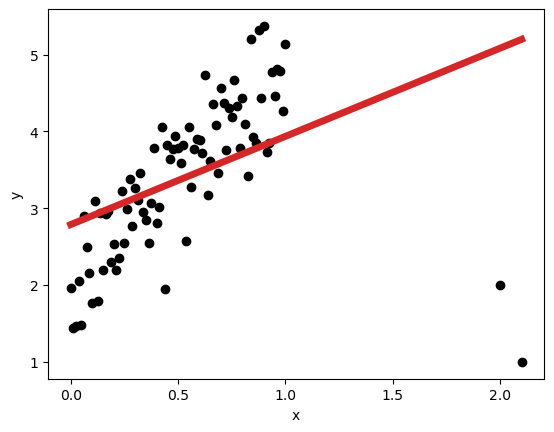

In [4]:
# Define a linear regression model and fit it to the data
reg1 = sklearn.linear_model.LinearRegression()
reg1.fit(x, y)

# Plot
plt.scatter(x, y, c='black')
plt.plot(x, reg1.predict(x), linewidth=5, color='tab:red')
plt.xlabel('x'); plt.ylabel('y'); plt.show()

In [6]:
@interact(alpha=(0.01, 10, 1))
def plot(alpha=0.01):
    ridge = sklearn.linear_model.LinearRegression(); ridge.fit(x, y)
    lasso = sklearn.linear_model.Ridge(alpha=alpha); lasso.fit(x, y)
    
    print('Ridge', ridge.intercept_, ridge.coef_)
    print('Lasso', lasso.intercept_, lasso.coef_)
    
    plt.scatter(x, y, c='black')
    plt.plot(x, ridge.predict(x), linewidth=5, color='tab:red')
    plt.plot(x, lasso.predict(x), linewidth=5, color='tab:purple')
    plt.xlabel('x'); plt.ylabel('y'); plt.show()

interactive(children=(FloatSlider(value=0.01, description='alpha', max=10.0, min=0.01, step=1.0), Output()), _…

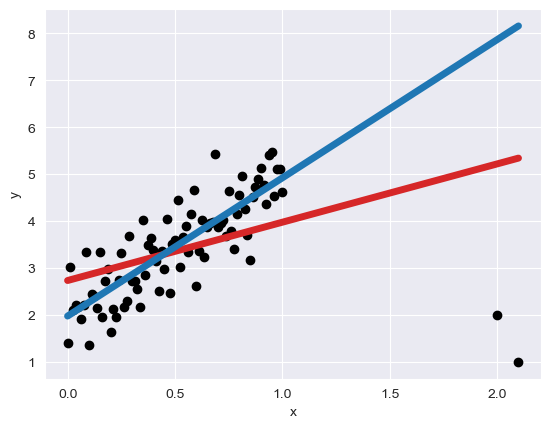

In [25]:
# Define a linear regression model and fit it to the data
reg1 = sklearn.linear_model.LinearRegression()
reg1.fit(x, y)

reg2 = sklearn.linear_model.LinearRegression()
reg2.fit(x[:-2], y[:-2])  # remove last two

# Plot
plt.scatter(x, y, c='black')
plt.plot(x, reg1.predict(x), linewidth=5, color='tab:red')
plt.plot(x, reg2.predict(x), linewidth=5, color='tab:blue')
plt.xlabel('x'); plt.ylabel('y'); plt.show()

Normal [2.73390531] [[1.24149825]]
Ridge [3.04257109] [0.66707538]


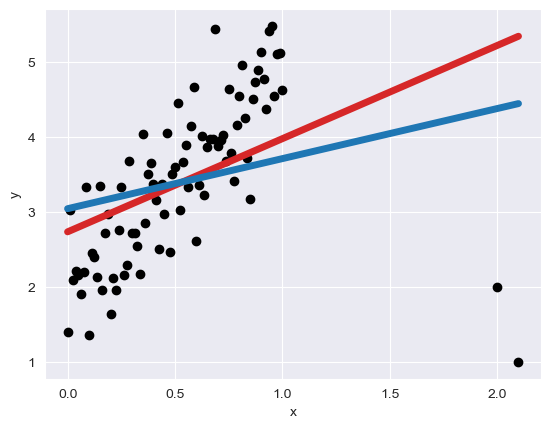

In [26]:
linear = sklearn.linear_model.LinearRegression(); linear.fit(x, y)
ridge = sklearn.linear_model.Ridge(alpha=10);ridge.fit(x, y)

print('Normal', linear.intercept_, linear.coef_)
print('Ridge', ridge.intercept_, ridge.coef_)

plt.scatter(x, y, c='black')
plt.plot(x, linear.predict(x), linewidth=5, color='tab:red')
plt.plot(x, ridge.predict(x), linewidth=5, color='tab:blue')
plt.xlabel('x'); plt.ylabel('y'); plt.show()

## Collinearity

In [27]:
x1 = numpy.linspace(start=0, stop=1, num=81).reshape(-1, 1)
x2 = 3 - x1 + numpy.random.normal(0, 0.000001, size=(len(x1), 1))
x = numpy.hstack([x1, x2])
y = 2*x1 - 2 + numpy.random.normal(0, 0.1, size=(len(x1), 1))

x[:4], y[:4], x.shape, y.shape

(array([[0.        , 2.99999864],
        [0.0125    , 2.98749868],
        [0.025     , 2.97499999],
        [0.0375    , 2.96249772]]),
 array([[-1.9554777 ],
        [-1.8789806 ],
        [-2.01866904],
        [-1.9524203 ]]),
 (81, 2),
 (81, 1))

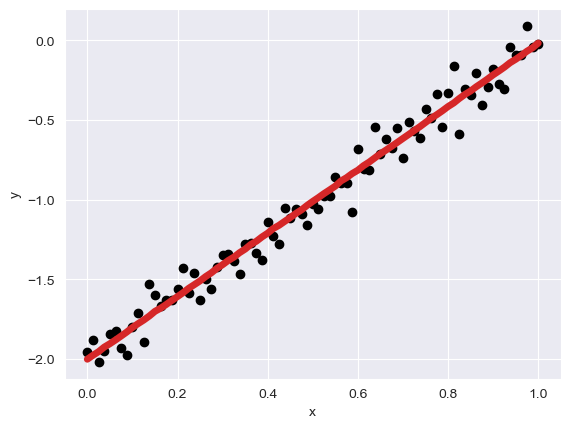

In [28]:
# Define a linear regression model and fit it to the data
reg1 = sklearn.linear_model.LinearRegression()
reg1.fit(x, y)

# Plot
plt.scatter(x1, y, c='black')
plt.plot(x1, reg1.predict(x), linewidth=5, color='tab:red')
plt.xlabel('x'); plt.ylabel('y'); plt.show()

In [29]:
reg1.intercept_, reg1.coef_

(array([5016.32927177]), array([[-1670.79238686, -1672.77774751]]))

In [30]:
@interact(alpha=(0.1, 10, 1))
def plot(alpha=0.1):
    linear = sklearn.linear_model.LinearRegression(); linear.fit(x, y)
    ridge = sklearn.linear_model.Ridge(alpha=alpha); ridge.fit(x, y)
    lasso = sklearn.linear_model.Lasso(alpha=alpha/200); lasso.fit(x, y)
    print('Linear', linear.intercept_, linear.coef_)
    print('Ridge', ridge.intercept_, ridge.coef_)
    print('Lasso', lasso.intercept_, lasso.coef_)
    plt.scatter(x1, y, c='black')
    plt.plot(x1, linear.predict(x), linewidth=5, color='tab:green')
    plt.plot(x1, ridge.predict(x), linewidth=5, color='tab:red')
    plt.plot(x1, lasso.predict(x), linewidth=5, color='tab:blue')
    plt.xlabel('x'); plt.ylabel('y'); plt.show()

interactive(children=(FloatSlider(value=0.1, description='alpha', max=10.0, min=0.1, step=1.0), Output()), _do…

### K-Nearest Neighbours

In [31]:
# Generate data
x = 2*numpy.random.random(size=(1000, 2)) - 1
x

array([[ 0.50299633,  0.73778876],
       [ 0.19516849,  0.81612396],
       [-0.41417278, -0.07069128],
       ...,
       [-0.98326474,  0.45702369],
       [ 0.3220935 , -0.97018054],
       [-0.9406031 , -0.560733  ]])

In [32]:
fun = lambda x: x[:,0]**2 + x[:,1]**2

y = fun(x)
y[:4]

array([0.79733756, 0.70414906, 0.17653635, 0.64897376])

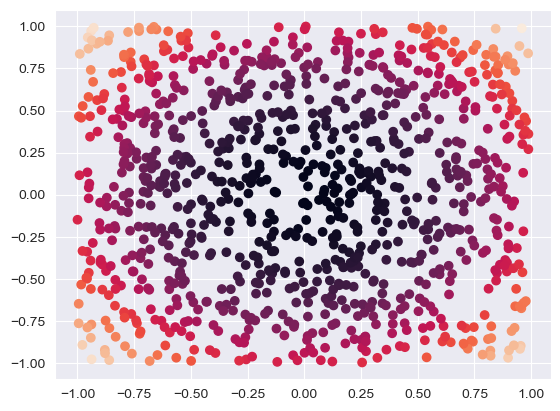

In [33]:
# Plot
plt.scatter(*zip(*x), c=y)
plt.show()

In [34]:
# K Nearest Neighbours
kn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)
kn.fit(x, y)

points = numpy.array([[0.3, 0.4], [-0.3, 0.6], [-30, 60]])
kn.predict(points), fun(points)

(array([0.26927957, 0.42936878, 1.83750273]),
 array([   0.25,    0.45, 4500.  ]))

### Support Vector Machine

In [35]:
svm = sklearn.svm.SVR(kernel='linear')
svm.fit(x, y)

points = numpy.array([[0.3, 0.4], [-0.3, 0.6], [-30, 60]])
svm.predict(points), fun(points)

(array([0.62267426, 0.6208716 , 3.20758586]),
 array([   0.25,    0.45, 4500.  ]))

In [36]:
svm = sklearn.svm.SVR(kernel='rbf')
svm.fit(x, y)

points = numpy.array([[0.3, 0.4], [-0.3, 0.6], [-30, 60]])
svm.predict(points), fun(points)

(array([0.33446926, 0.5169031 , 1.37460931]),
 array([   0.25,    0.45, 4500.  ]))